In [1]:
# Copyright 2024 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Advance Prompting for ImageGeneration Using Imagen2

<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/GoogleCloudPlatform/generative-ai/blob/main/vision/use-cases/generative-ai/vision/use-cases/Advanced_prompting_for_image_generation_on_Imagen2.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Google Colaboratory logo"><br> Open in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https:%2F%2Fraw.githubusercontent.com%2FGoogleCloudPlatform%2Fgenerative-ai%2Fblob%2Fmain%2Fvision%2Fuse-cases%2Fgenerative-ai%2Fvision%2Fuse-cases%2FAdvanced_prompting_for_image_generation_on_Imagen2.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo"><br> Open in Colab Enterprise
    </a>
  </td>    
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/GoogleCloudPlatform/generative-ai/blob/main/vision/use-cases/generative-ai/vision/use-cases/Advanced_prompting_for_image_generation_on_Imagen2.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo"><br> Open in Workbench
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/use-cases/generative-ai/vision/use-cases/Advanced_prompting_for_image_generation_on_Imagen2.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
</table>


| | |
|-|-|
| Author(s):
[Abhijat Gupta](https://github.com/abhijat-gupta) |
[Harish Verma](https://github.com/harishverma8)

## Overview

AI image generation opens a world of visual possibilities, but unleashing its true power requires a touch of finesse. If you're ready to move beyond simple prompts and take creative control, this notebook is for you. We'll explore advanced prompting techniques that will transform the way you generate images with AI.

The notebook demonstrates the usage of text-bison or gemini-pro LLMs to enhance the prompt, which will then be consumed by imagen LLMs. This enhancement will add supporting props and details to the user single liner prompts. We also sometimes want to generate images with a custom set of colors, this notebook helps you to achieve that through prompting. We also, at times, need to include styling to the generated images, like ligh conditions, lens positioning, people dressing styles, skin-tones, backgrounds, etc., this notebook also enables you provide such custom styles through pure test promopting.

#### Prompt Enhancement:  
- Enhance your basic one liner prompts using LLMs to more detailed and complete prompts  
- User can switch between *text-bison* or *gemini-pro* using the 'use_gemini' flag. mark it True to use Gemini generated enhanced prompt for Imagen
#### Using Hex color codes in Prompts:
- We can pass the hex values of the colors that we wish to see in the generated images
- Use 'custom_color_palette' flag, set it to True if you wish to provide your color palatte
#### Styling your image with text prompts
- We can pass styles and append it to the original prompt with a **","** (comma)
- Styles can contain of type of people, their dressing, their skin tone, etc.
- Styles can also contain details of the background and environment.
- Example: 
'your_style_1':  {
        'persona': 'people dressed in business casuals with warm toned skin, showing positive charisma and healthy lifestyle',
        'environment': 'saturated, pleasant, true to life, focused'
    }

## Costs

This tutorial uses the following billable components of Google Cloud:
- Vertex AI (Text Bison, Gemini-pro, Imagen)

Learn about [Vertex AI Generative AI pricing](https://cloud.google.com/vertex-ai/generative-ai/pricing) and use the [Pricing Calculator](https://cloud.google.com/products/calculator/) to generate a cost estimate based on your projected usage.

## Using this API

- update the **config** according to your requirement
- call **prompt_styling()** function

## Getting Started

#### Install Packages

In [48]:
! pip install -q --upgrade google-cloud-aiplatform

### Restart runtime (Colab only)

To use the newly installed packages, you must restart the runtime on Google Colab.

In [ ]:
import sys

if "google.colab" in sys.modules:
    import IPython

    app = IPython.Application.instance()
    app.kernel.do_shutdown(True)

#### Authenticate your notebook environment (Colab only)

Authenticate your environment on Google Colab.


In [ ]:
import sys

if "google.colab" in sys.modules:
    from google.colab import auth

    auth.authenticate_user()

## Config

In [73]:
PROJECT_ID = "harish-test-project-361706"
# PROJECT_ID= "your-project-id"
LOCATION = "us-central1"

GEMINI_MODEL_PRO = "gemini-1.0-pro"
BISON_MODEL = "text-bison"
VISION_MODEL = "imagegeneration@005"
ENDPOINT_URL = f"projects/{PROJECT_ID}/locations/{LOCATION}/publishers/google/models/{VISION_MODEL}"

## Imagen2 configs
ASPECT_RATIOS = ["1:1", "9:16"]
IMAGE_FORMATS = ["jpg", "jpeg", "png"]
NUMBER_OF_IMAGES = 4
GUIDANCE_SCALE = 90
SEED = 925

COLOR_PALATTE = "[ #71767C, #ED0007, #00884A]"
# COLOR_PALATTE = "[#000000, #FFFFFF, #71767C, #ED0007, #9E2896, #007BC0, #18837E, #00884A, #C535BC, #007BC0, #18837E, #00884A]"

PARAMETERS = {"max_output_tokens": 120, "temperature": 0.1, "top_p": 0.2, "top_k": 40}

DEFAULT_STYLE = "no_style"
DEFAULT_PROMPT = "a dog wearing sunglasses on a surfboard"
DEFAULT_ASPECT_RATIO = "1:1"
DEFAULT_RESOLUTION = "1536"
DEFAULT_FORMAT = "jpeg"

In [74]:
# example styles
STYLES = {
    "no_style": {
        "persona": "people dressed as per the requirement, showing positive charisma and healthy lifestyle",
        "environment": "saturated, true to life, realistic, extremely detailed",
    },
    "corporate": {
        "persona": "people dressed in business casuals with warm toned skin, showing positive charisma and healthy lifestyle",
        "environment": "saturated, pleasant, true to life, focused",
    },
    "healthcare_solutions": {
        "persona": "warm toned people",
        "environment": "more white backgrounds, clean surroundings, realistic, focused, depth of field, blue and turqoise colors",
    },
    "home_appliances": {
        "persona": "warm toned people dressed casually, showing positive charisma and healthy lifestyle",
        "environment": "pastel color backgrounds, realistic, focused, depth of field",
    },
}

In [75]:
save_images = True
image_saved_path = "./"
use_gemini = True
disable_enhanced_prompting = False
custom_color_palette = False

## Codebase

In [76]:
import json
import vertexai
from vertexai.preview.vision_models import Image, ImageGenerationModel
from vertexai.preview.language_models import TextGenerationModel
from vertexai.generative_models import GenerativeModel

vertexai.init(project=PROJECT_ID, location=LOCATION)

In [77]:
def prompt_styling():
    """Generates images based on custom style and settings"""

    def parse_json(request_json):
        """Parses JSON request from user."""
        # style type
        if request_json and "style" in request_json:
            provided_style = request_json["style"]
        else:
            provided_style = DEFAULT_STYLE

        style = STYLES[provided_style]

        # prompt
        if request_json and "prompt" in request_json:
            user_prompt = request_json["prompt"]
        else:
            user_prompt = DEFAULT_PROMPT

        # aspect ratio
        if request_json and "aspect_ratio" in request_json:
            aspect_ratio_provided = request_json["aspect_ratio"]
        else:
            aspect_ratio_provided = DEFAULT_ASPECT_RATIO

        # resolution
        if request_json and "resolution" in request_json:
            resolution = request_json["resolution"]
        else:
            resolution = DEFAULT_RESOLUTION

        # image_format
        if request_json and "image_format" in request_json:
            image_format = request_json["image_format"]
        else:
            image_format = DEFAULT_FORMAT

        return style, user_prompt, aspect_ratio_provided, resolution, image_format

    def generate_enhanced_prompt(user_prompt):
        """Generates enhanced prompt using text LLMs."""
        if disable_enhanced_prompting is False:
            if custom_color_palette:
                prompt_for_imagen = f"""You are an expert in writing prompts for image generation model and have immense knowledge of photography, based on user_prompt and settings, generate a 150 words prompt adding supporting props to the image subject, but do NOT add too much information, keep it on the simpler side. Add "a photo of" prefix to every prompt.
                Use below settings for generating the image:
                - Color palette : {color_palatte}
                - Brightness: [90]
                - Persona: {style["persona"]}
                - Environment: {style["environment"]}
                Scenario: {user_prompt}
                Prompt:
                """
            else:
                prompt_for_imagen = f"""You are an expert in writing prompts for image generation model and have immense knowledge of photography, based on scenario and settings, generate a 150 words prompt adding details and supporting props to the image subject, but do NOT add too much information, keep it on the simple side. Add "a photo of" prefix to every prompt.
                Use below settings for generating the image:
                - Brightness: [90]
                - Persona: {style["persona"]}
                - Environment: {style["environment"]}
                Scenario: {user_prompt}
                Prompt:
                """
        else:
            prompt_for_imagen = user_prompt

        # Generate Imagen prompt using text-bison model
        bison = TextGenerationModel.from_pretrained(BISON_MODEL)

        # Generate Imagen prompt using gemini-pro model
        gemini = GenerativeModel(GEMINI_MODEL_PRO)

        img_gen_prompt_bison = bison.predict(prompt_for_imagen, **PARAMETERS)

        img_gen_prompt_gemini = gemini.generate_content(
            prompt_for_imagen,
        )
        return img_gen_prompt_bison.text, img_gen_prompt_gemini.text

    def generate_images(bison_prompt, gemini_prompt):
        """Generates images using imagen@005."""
        image_model = ImageGenerationModel.from_pretrained(VISION_MODEL)

        if use_gemini:
            print("\n")
            print("Using Gemini generated prompt.")
            print("\n")
            prompt = gemini_prompt
        else:
            prompt = bison_prompt

        images = image_model.generate_images(
            prompt=prompt,
            number_of_images=NUMBER_OF_IMAGES,
            seed=SEED,
            guidance_scale=GUIDANCE_SCALE,
            add_watermark=False,
        )
        return images

    style, user_prompt, aspect_ratio_provided, resolution, image_format = parse_json(
        request_json
    )

    print(
        f"user provided request: {(style, user_prompt, aspect_ratio_provided, resolution, image_format)}"
    )
    print("\n")

    bison_prompt, gemini_prompt = generate_enhanced_prompt(user_prompt)

    print(f"prompt generated using {BISON_MODEL}: {bison_prompt}")
    print("\n")
    print(f"prompt generated using {GEMINI_MODEL_PRO}: {gemini_prompt}")

    return generate_images(bison_prompt, gemini_prompt), image_saved_path

## Request

In [78]:
request_json = {
    "request_type": "image_generation",
    "style": "home_appliances",
    "prompt": "A happy woman in the kitchen working with a mixer",
    "aspect_ratio": "9:16",
    "disable_advanced_prompting": True,
    "custom_color_palette": False,
    "image_format": "jpeg",
}

In [79]:
results, image_saved_path = prompt_styling()

user provided request: ({'persona': 'warm toned people dressed casually, showing positive charisma and healthy lifestyle', 'environment': 'pastel color backgrounds, realistic, focused, depth of field'}, 'A happy woman in the kitchen working with a mixer', '9:16', '1536', 'jpeg')


prompt generated using text-bison:  A photo of a woman in a bright, pastel-colored kitchen, wearing casual clothing and a warm smile, using a vintage-looking electric hand mixer to prepare a delicious-looking batter in a glass bowl, surrounded by various fresh ingredients such as eggs, flour, sugar, and fruits, with a cozy atmosphere and soft, natural lighting.


prompt generated using gemini-1.0-pro: A photo of a woman in a light blue kitchen happily baking. She is wearing a soft pink apron and has a big smile on her face. The kitchen counter and table are a turquoise blue, with pale yellow cabinets


Using Gemini generated prompt.




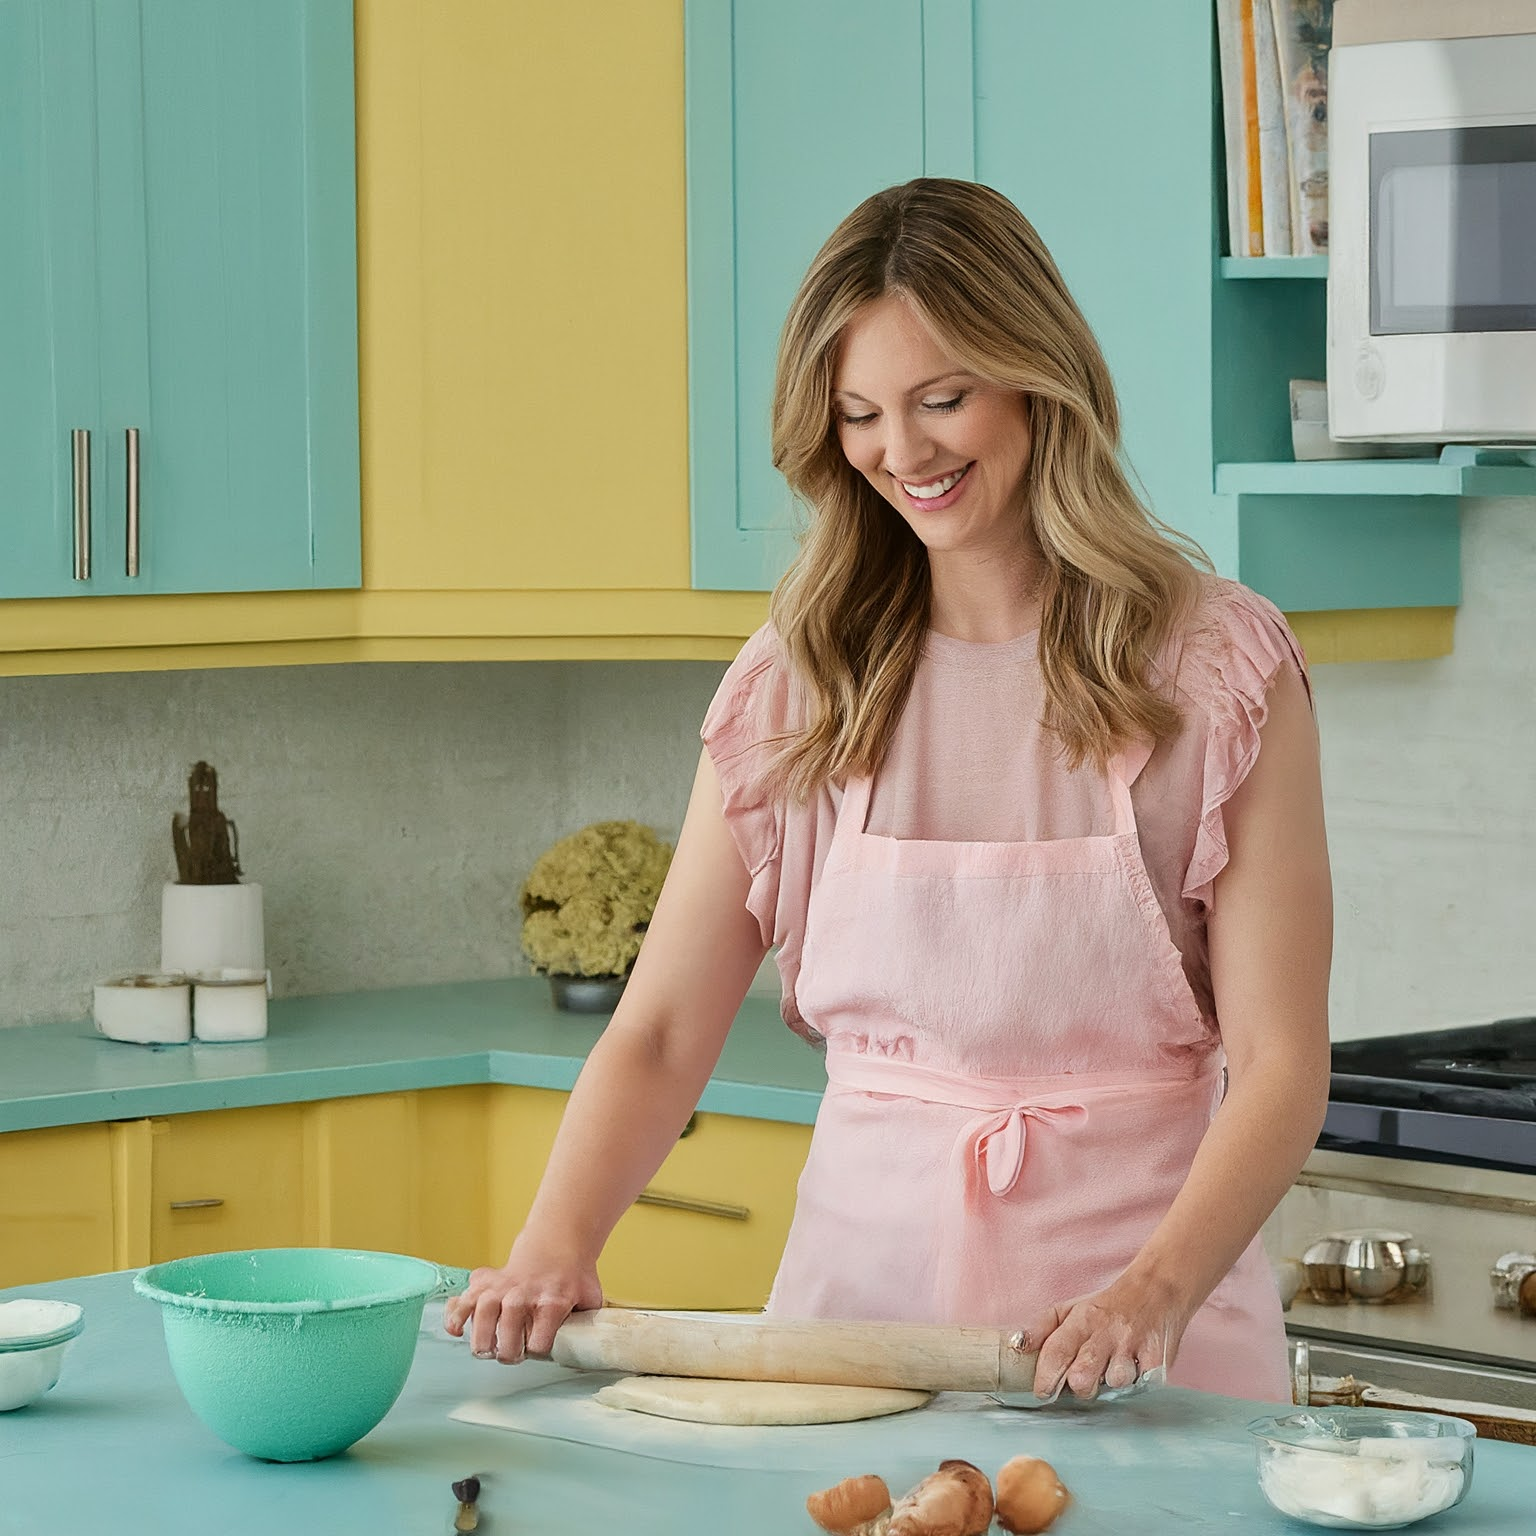

In [80]:
# view generated images
for result in results:
    result.show()
    break